#Library and Data Loading

In [294]:
#import the required libraries if not installed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

I have used google collab, if someone using jupiter or any other than change code accordingly.

In [209]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
train_df = pd.read_csv("/content/drive/MyDrive/survey.csv")
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

#Data Cleaning

In [211]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

In [212]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Cleaning NaN

In [213]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [214]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [215]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

<ipython-input-215-821e3e159c4e>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
<ipython-input-215-821e3e159c4e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

['female' 'male' 'trans']


In [216]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

<ipython-input-216-becada5b4f8f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
<ipython-input-216-becada5b4f8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
<ipython-input-216-becada5b4f8f>:7: SettingWithCopy

In [217]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


<ipython-input-217-4816e127075b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')


In [218]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


<ipython-input-218-c74d19fb7d34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )


#Encoding Data

In [219]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Age [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(60), np.int64(61), np.int64(62), np.int64(65), np.int64(72)]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Mo

<ipython-input-219-4be0b132954e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature] = le.transform(train_df[feature])
<ipython-input-219-4be0b132954e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature] = le.transform(train_df[feature])
<ipython-input-219-4be0b132954e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [220]:
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Testing there aren't any missing data

In [221]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0      0.0
obs_consequence                0  

Features Scaling: We're going to scale age, because it is extremely different from the other ones.

#Covariance Matrix. Variability comparison between categories of variables

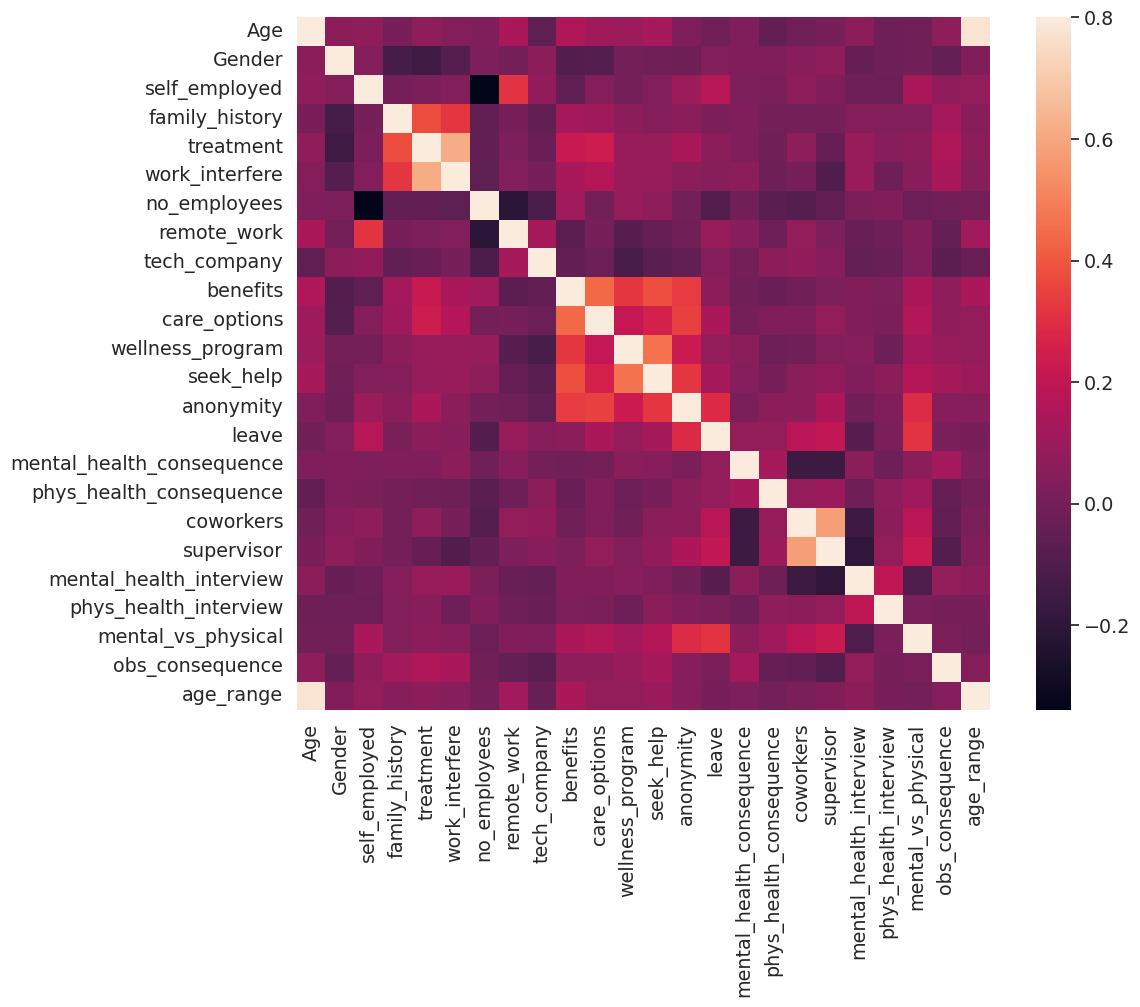

In [222]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [223]:
# Method 1: Remove highly correlated features
corr_threshold = 0.8
corr_matrix = train_df.corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > corr_threshold)]
train_df.drop(to_drop, axis=1, inplace=True)

# Method 2: Select features with low correlation
corr_threshold = 0.5
corr_matrix = train_df.corr()
low_corr_features = [column for column in corr_matrix.columns if all(abs(corr_matrix[column]) < corr_threshold)]
selected_features = train_df[low_corr_features]

# Method 3: Use recursive feature elimination (RFE)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Assuming 'Gender' is the target variable, replace with your actual target
target = train_df['Gender']  # Define the target variable
X = train_df.drop('Gender', axis=1) # Separate features from the target

rfc = RandomForestClassifier(n_estimators=100)
rfe = RFE(rfc, n_features_to_select=10)
rfe.fit(X, target) # Fit RFE on features and target
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['Age', 'work_interfere', 'no_employees', 'care_options', 'seek_help',
       'leave', 'mental_health_consequence', 'supervisor',
       'phys_health_interview', 'mental_vs_physical'],
      dtype='object')


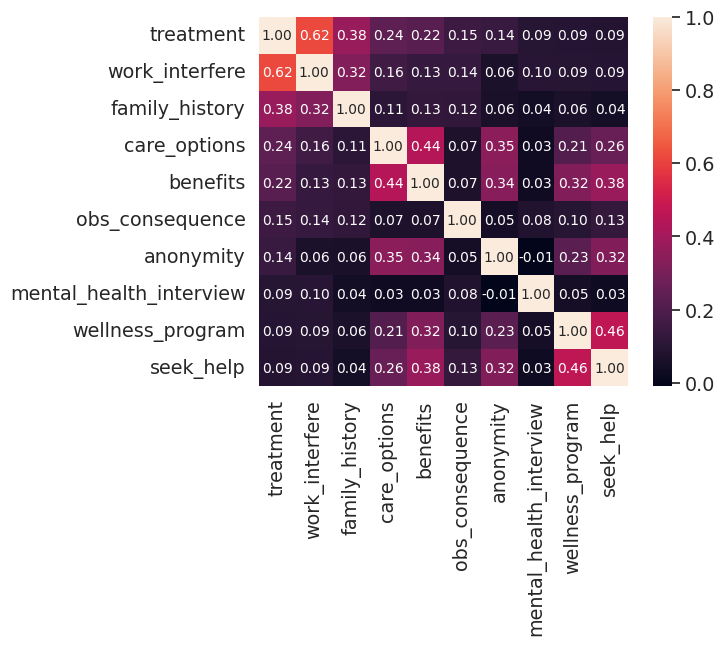

In [224]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Some charts to see data relationship

**Distribution** and density by Age

<ipython-input-225-32fd91214377>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)


Text(0.5, 0, 'Age')

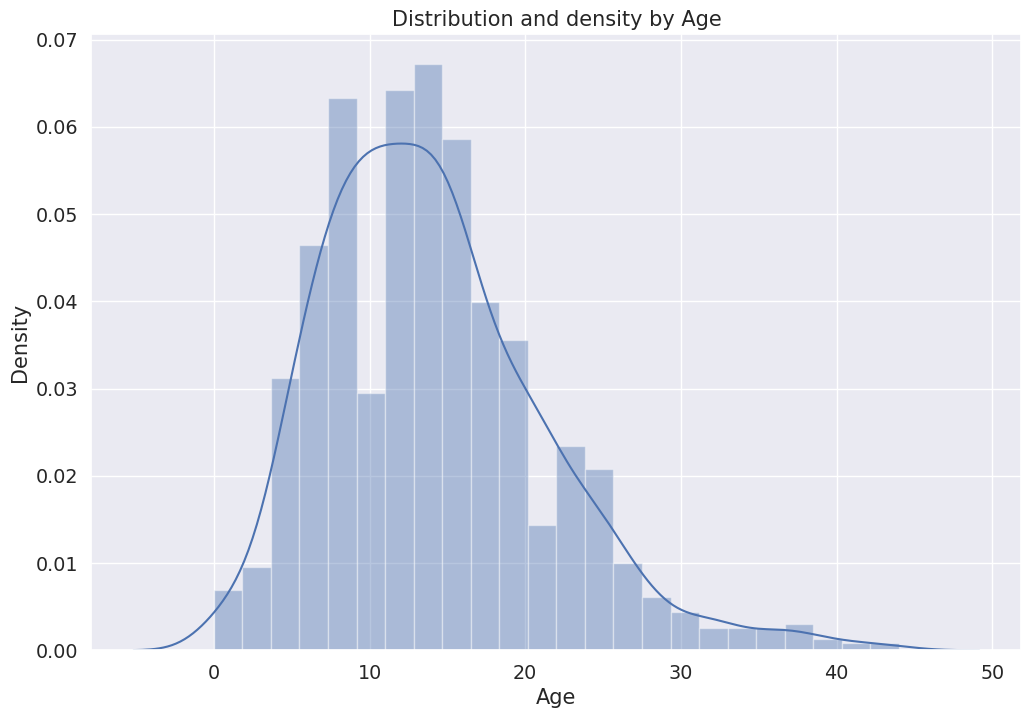

In [225]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

Separate by treatment

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


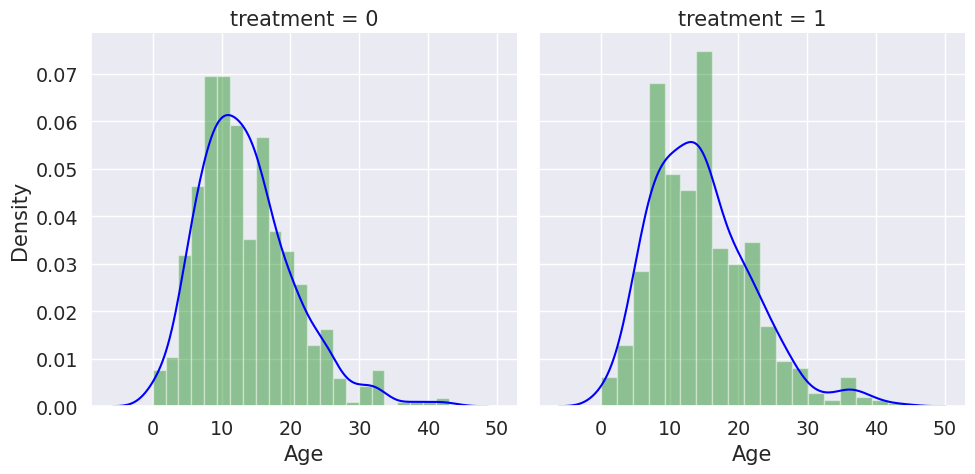

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_df' is already defined with 'treatment' and 'Age' columns

g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.distplot, "Age", color='blue', hist_kws={'color': 'green'}) # Set line color to red, fill to blue

plt.savefig('agetreatment.png')

How many people has been treated?

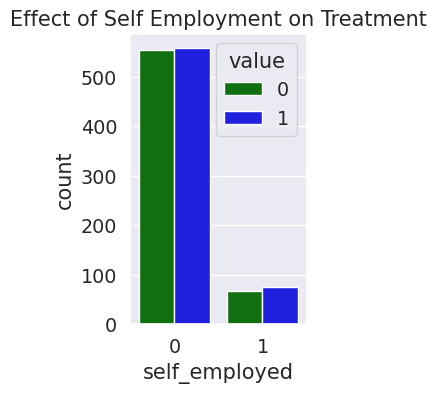

<Figure size 640x480 with 0 Axes>

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_df' is the DataFrame you want to use
plt.figure(figsize=(5,40))
plt.subplot(9,2,1)
# Use 'self_employed' instead of 'Self_employed'
# Convert data to long format for using 'hue'
df_long = train_df.melt(id_vars=['self_employed'], value_vars=['treatment'])
sns.countplot(x='self_employed', hue='value', data=df_long, palette=['green', 'blue']) # Set colors to green and blue
plt.title('Effect of Self Employment on Treatment')
plt.show()
plt.savefig('selfemployedtreatment.png')

Text(0.5, 1.0, 'Employment type')

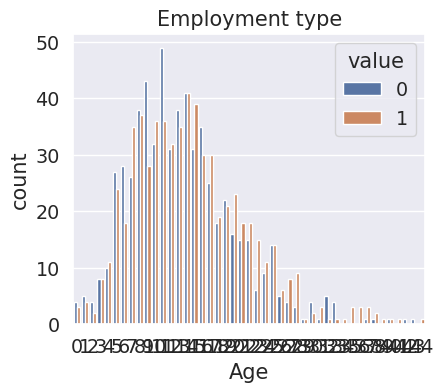

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_df' is the DataFrame you want to use
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
# Use 'self_employed' instead of 'Self_employed'
# Convert data to long format for using 'hue'
df_long = train_df.melt(id_vars=['Age'], value_vars=['treatment'])
sns.countplot(x='Age', hue='value', data=df_long)
plt.title('Employment type')

<ipython-input-229-5732ad6b8e58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="treatment", data=train_df ,palette=['red', 'yellow'])
<ipython-input-229-5732ad6b8e58>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels)


Text(0.5, 1.0, 'Total Distribution by treated or not')

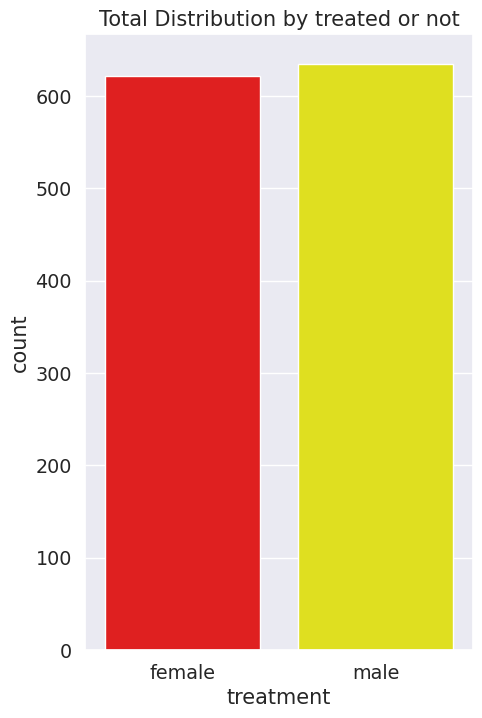

In [229]:
plt.figure(figsize=(5,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train_df ,palette=['red', 'yellow'])
g.set_xticklabels(labels)
plt.savefig('gendertreatment.png')

plt.title('Total Distribution by treated or not')

Nested barplot to show probabilities for class and sex

<ipython-input-230-a09b005e5c67>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette=["#0097A7", "#FFC107","green"])  # added palette parameter


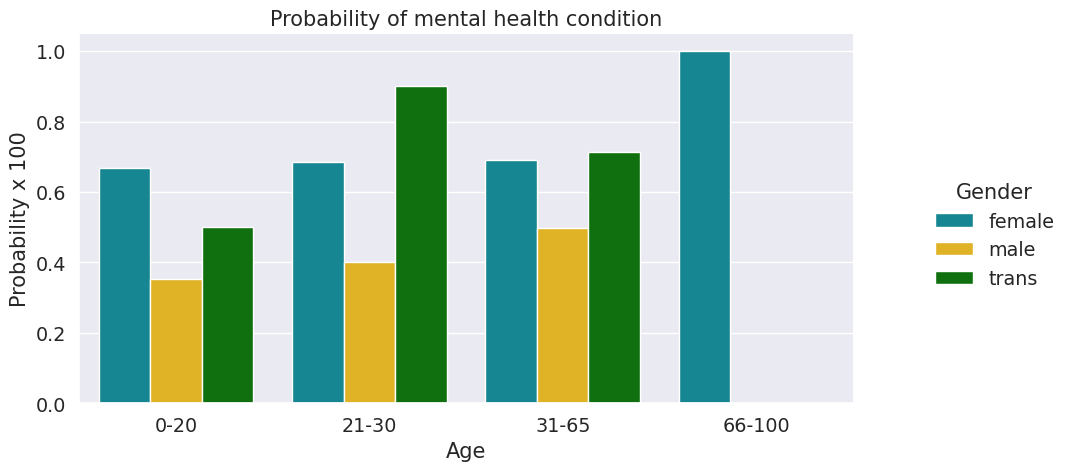

In [230]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette=["#0097A7", "#FFC107","green"])  # added palette parameter
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.savefig('ageprobability.png')
plt.show()

Barplot to show probabilities for family history

<ipython-input-231-fc546dc97c91>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True, palette=["#FF008A", "#FFC107","green"])


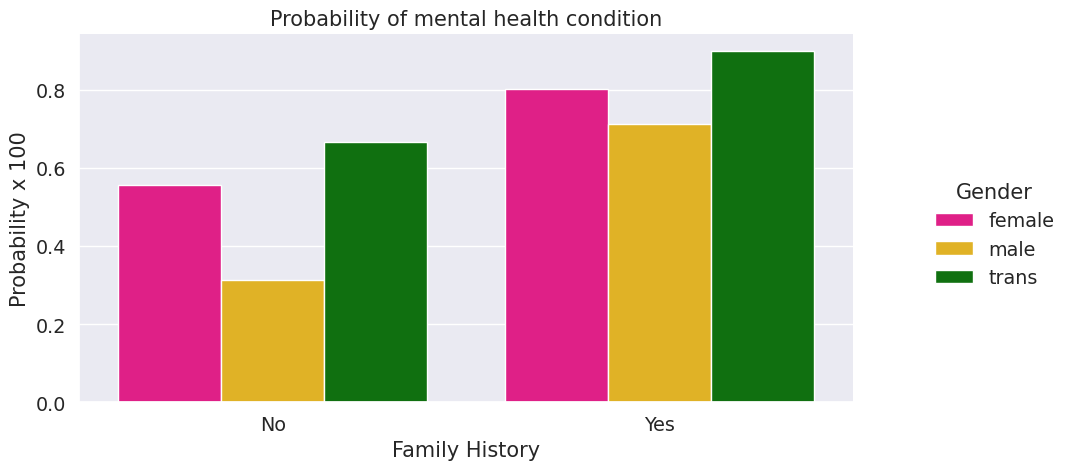

In [231]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True, palette=["#FF008A", "#FFC107","green"])
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.savefig('familyhistoryprobability.png')


plt.show()

Barplot to show probabilities for care options

<ipython-input-232-882fd34cd62d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True, palette=["#0097A7","blue","violet"])


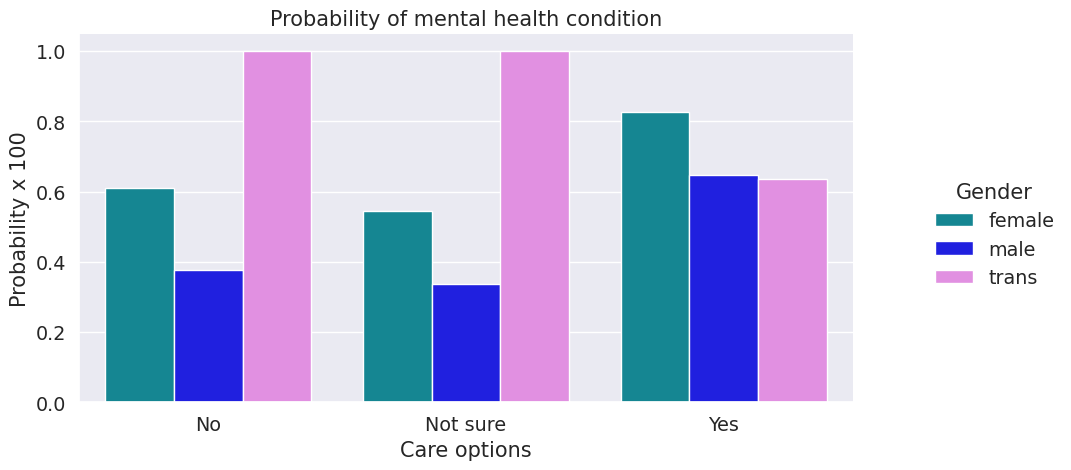

In [232]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True, palette=["#0097A7","blue","violet"])
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.savefig('careoptionprobability.png')
plt.show()

Barplot to show probabilities for benefits



<ipython-input-233-35c05a5ac0e6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)


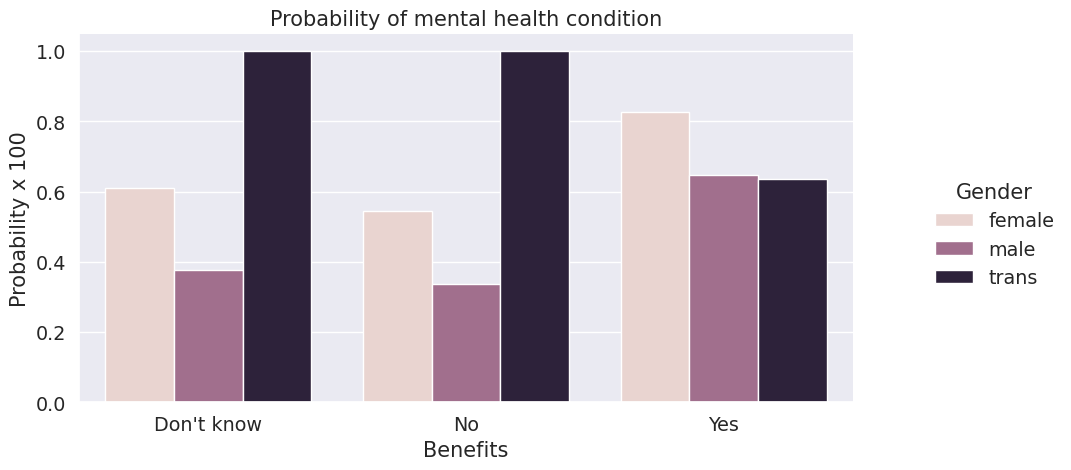

In [233]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.savefig('benefitprobability.png')
plt.show()

Barplot to show probabilities for work interfere



<ipython-input-234-13a7c64aab2c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)


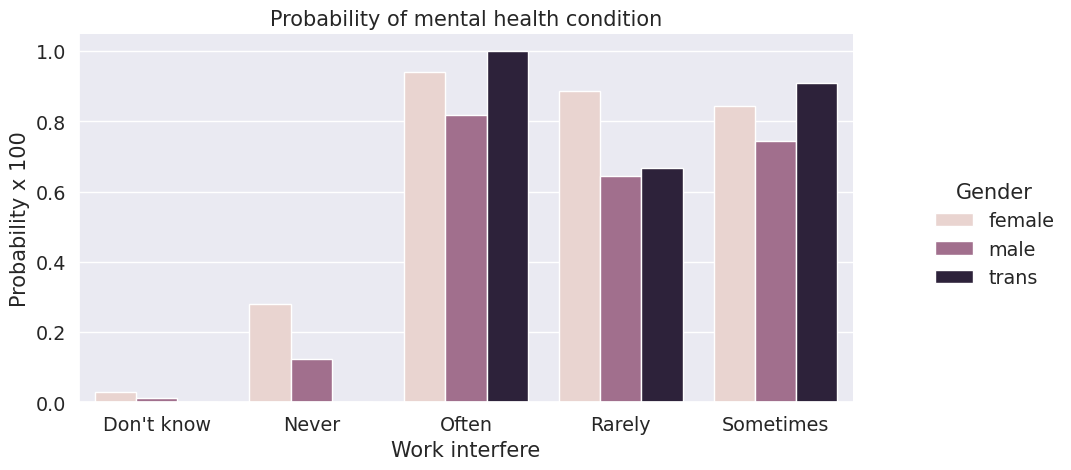

In [234]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.savefig('workinferenceprobability.png')
plt.show()

#Scaling and Fitting

Features Scaling We're going to scale age, because is extremely different from the othere ones.



In [235]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Spilitting Dataset

In [236]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

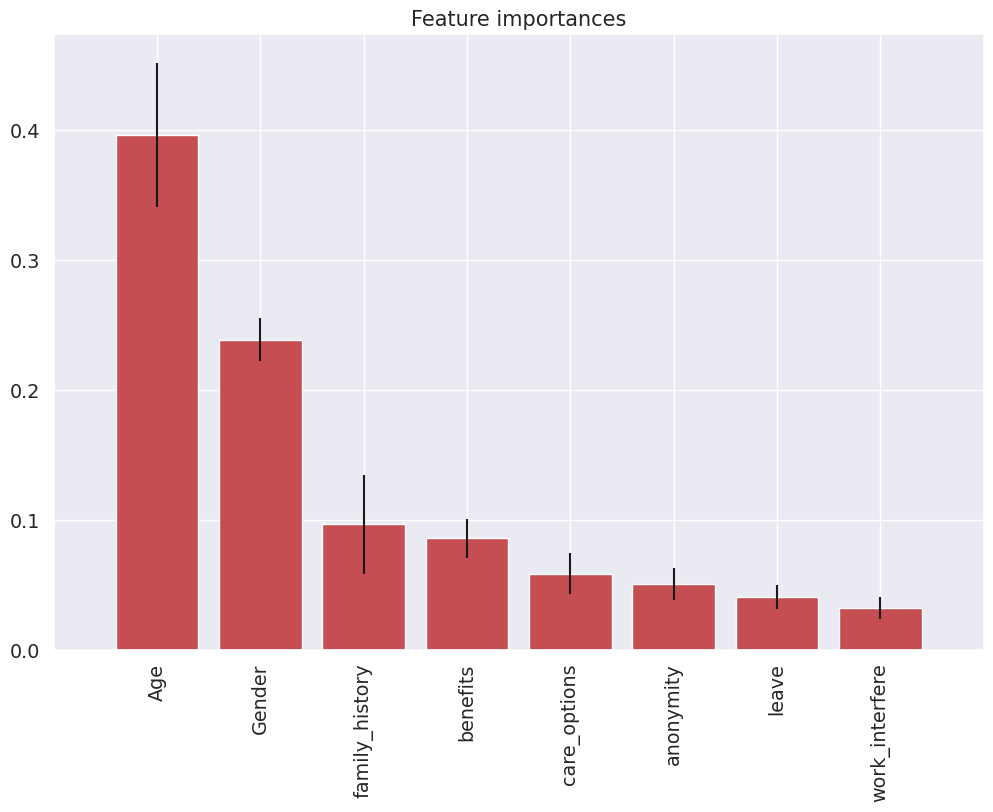

In [237]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.savefig('features.png')
plt.show()

#Tuning

In [238]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())

    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())

    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())

    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))


    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')


    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]

    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################

    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)



    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

Tuning with cross validation score

In [239]:
def tuningCV(knn):

    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

Tuning with GridSearchCV

In [240]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)

    # view the complete results (list of named tuples)
    grid.grid_scores_

    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)

    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)

    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

Tuning with RandomizedSearchCV

In [241]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

Tuning with searching multiple parameters simultaneously

In [242]:
def tuningMultParam(knn):

    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)

    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)

    # view the complete results
    print(grid.grid_scores_)

    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

#Evaluating models

Logistic Regression

In [243]:
# def logisticRegression():
#     # train a logistic regression model on the training set
#     logreg = LogisticRegression()
#     logreg.fit(X_train, y_train)

#     # make class predictions for the testing set
#     y_pred_class = logreg.predict(X_test)

#     accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)

#     #Data for final graph
#     methodDict['Log. Regression'] = accuracy_score * 100


In [244]:
def evalClassModel(model, y_test, y_pred_class, plot):
    # ... (rest of your evalClassModel function)

    # Calculate predicted probabilities (if not already done before calling the function)
    y_pred_prob = model.predict_proba(X_test)  # Assuming 'X_test' is available in the scope

    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob[:, 1].reshape(-1,1)  # Select probabilities for the positive class

    # ... (rest of your evalClassModel function)

    return accuracy_score(y_test, y_pred_class) # Return the calculated accuracy value

Model accuracy: 0.79%


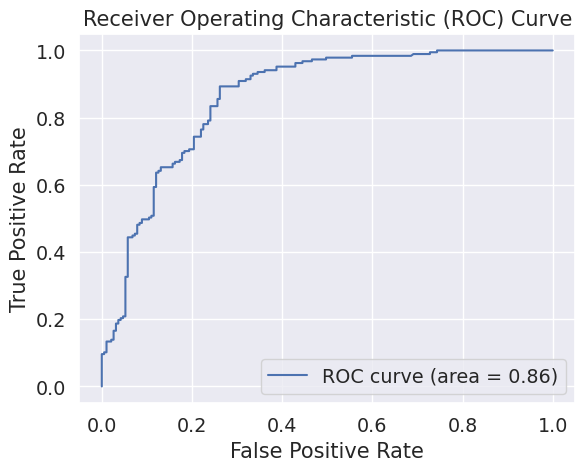

Model accuracy: 0.79%


In [245]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def evalClassModel(model, y_test, y_pred_class, plot):
    # Calculate predicted probabilities
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = y_pred_prob[:, 1].reshape(-1,1)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"Model accuracy: {accuracy:.2f}%")

    # Plot the ROC curve (if plot is True)
    if plot:
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characteristic (ROC) Curve")
        plt.legend()
        plt.show()

    return accuracy

# Example usage:
# X_train =...  # feature data for training set
# y_train =...  # target labels for training set
# X_test =...  # feature data for testing set
# y_test =...  # target labels for testing set

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)

accuracy = evalClassModel(logreg, y_test, y_pred_class, plot=True)
print(f"Model accuracy: {accuracy:.2f}%")

In [246]:
# (X_train['work_interfere']!= 0).sum()
import pandas as pd

# assuming X_train is a Pandas DataFrame
unique_values = X_train['work_interfere'].nunique()
print("Number of unique values in work_interfere:", unique_values)

# or, to get the actual unique values
unique_values_list = X_train['work_interfere'].unique()
print("Unique values in work_interfere:", unique_values_list)

Number of unique values in work_interfere: 5
Unique values in work_interfere: [1 3 4 2 0]


In [247]:
print(X_train)

           Age  Gender  family_history  benefits  care_options  anonymity  \
929   0.295455       1               1         0             0          0   
901   0.568182       1               1         1             0          0   
579   0.363636       1               1         2             0          0   
367   0.409091       1               1         1             2          2   
615   0.272727       1               0         1             1          0   
...        ...     ...             ...       ...           ...        ...   
763   0.454545       1               1         1             0          1   
835   0.590909       1               1         0             0          0   
1218  0.227273       1               0         1             1          0   
559   0.136364       1               0         0             1          0   
684   0.068182       0               0         1             0          0   

      leave  work_interfere  
929       4               1  
901       3    

In [248]:
import pandas as pd

# Assuming X_train is your DataFrame
columns_to_analyze = [
    'Age',  # or the correct column name
    'Gender',
    'family_history',
    'benefits',
    'care_options',
    'anonymity',
    'leave',
    'work_interfere'
]

for column in columns_to_analyze:
    if column in X_train.columns:
        unique_values = X_train[column].nunique()
        unique_values_list = X_train[column].unique()
        print(f"Column: {column}")
        print(f"Number of unique values: {unique_values}")
        print(f"Unique values: {unique_values_list}")
    else:
        print(f"Column '{column}' not found in DataFrame.")
    print("-" * 40)


Column: Age
Number of unique values: 41
Unique values: [0.29545455 0.56818182 0.36363636 0.40909091 0.27272727 0.43181818
 0.18181818 0.20454545 0.15909091 0.5        0.22727273 0.38636364
 0.47727273 0.34090909 0.31818182 0.04545455 0.11363636 0.13636364
 0.02272727 0.45454545 0.25       0.54545455 0.75       0.59090909
 0.63636364 0.06818182 0.09090909 0.61363636 0.68181818 0.70454545
 0.52272727 0.72727273 0.         0.65909091 0.81818182 0.79545455
 0.86363636 0.84090909 0.93181818 0.90909091 0.97727273]
----------------------------------------
Column: Gender
Number of unique values: 3
Unique values: [1 0 2]
----------------------------------------
Column: family_history
Number of unique values: 2
Unique values: [1 0]
----------------------------------------
Column: benefits
Number of unique values: 3
Unique values: [0 1 2]
----------------------------------------
Column: care_options
Number of unique values: 3
Unique values: [0 2 1]
----------------------------------------
Column:

Confusion Matrix:
[[142  49]
 [ 29 158]]
Accuracy: 0.7936507936507936
ROC AUC Score: 0.8620404849231459


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


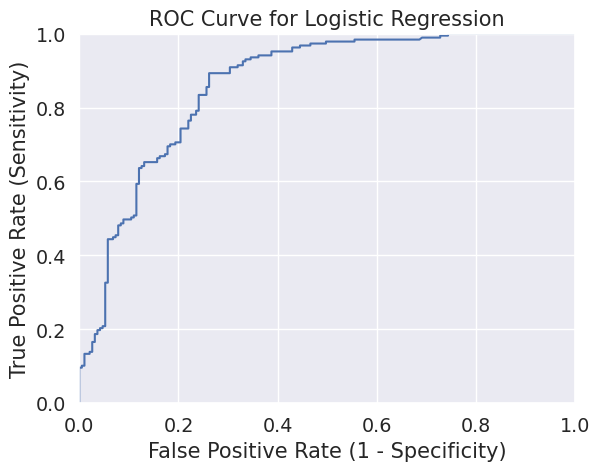

In [249]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer  # Import the imputer
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()

    # Convert X_train and y_train to NumPy arrays and handle potential ellipsis objects
    X_train_array = np.array(X_train)
    y_train_array = np.array(y_train)

    # Check if X_train_array contains ellipsis objects and replace them with NaN
    if ... in X_train_array:
        X_train_array[X_train_array == ...] = np.nan

    # Reshape the array to 2D before imputation if it's a scalar
    if X_train_array.ndim == 0:
        X_train_array = X_train_array.reshape(1,-1)  # Reshape to a single sample with one feature

    # Impute missing values (NaN) with the mean of each column
    imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
    X_train_array = imputer.fit_transform(X_train_array)

    # Reshape the arrays to 2D if they become 1D after NaN replacement
    if X_train_array.ndim == 1:
        X_train_array = X_train_array.reshape(-1,1) # Reshape to multiple samples with a single feature

    if y_train_array.ndim == 0:
        y_train_array = y_train_array.reshape(-1,1)  # Reshape to multiple samples with a single feature

    logreg.fit(X_train_array, y_train_array)

    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

    accuracy_score_result = evalClassModel(logreg, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score_result * 100

def evalClassModel(model, y_test, y_pred_class, plot):
    # Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred_class))

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred_class)
    print("Accuracy:", accuracy)

    # Calculate predicted probabilities (if not already done before calling the function)
    y_pred_prob = model.predict_proba(X_test)  # Assuming 'X_test' is available in the scope

    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob[:, 1].reshape(-1,1)  # Select probabilities for the positive class

    # ROC AUC Score
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

    # ROC Curve
    if plot:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC Curve for Logistic Regression')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        plt.show()

    return accuracy # Return the calculated accuracy value

# Assuming you have X_train, y_train, X_test, y_test, and methodDict defined elsewhere
logisticRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Confusion Matrix:
[[142  49]
 [ 29 158]]
Accuracy: 0.7936507936507936
ROC AUC Score: 0.8620404849231459


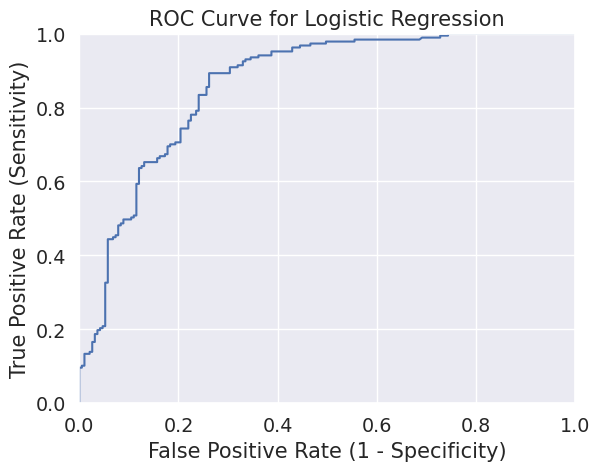

In [250]:
logisticRegression()

Accuracy: 0.7936507936507936
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       191
           1       0.76      0.84      0.80       187

    accuracy                           0.79       378
   macro avg       0.80      0.79      0.79       378
weighted avg       0.80      0.79      0.79       378

Confusion Matrix:
[[142  49]
 [ 29 158]]


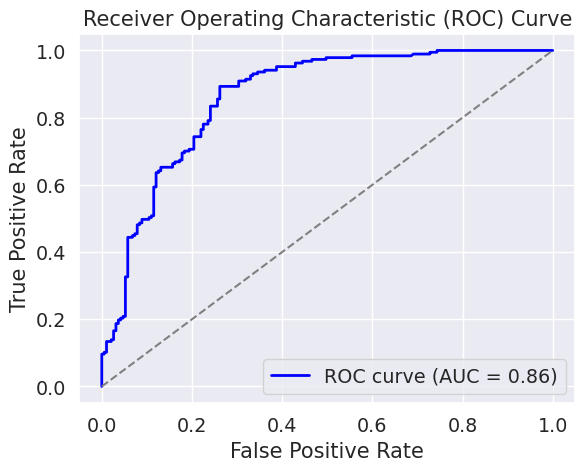

In [251]:
# Logistic Regression
#!pip install scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc # Import auc function
import matplotlib.pyplot as plt

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr) # Now you can use auc
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('logisticregressionroc_curve.png')  # Save the ROC curve as roc_curve.png
plt.show()

In [256]:
def evalClassModel(model, y_test, y_pred_class, plot):
    # ... (rest of your evalClassModel function)

    # Calculate predicted probabilities (if not already done before calling the function)
    y_pred_prob = model.predict_proba(X_test)  # Assuming 'X_test' is available in the scope

    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob[:, 1].reshape(-1,1)  # Select probabilities for the positive class

    # ... (rest of your evalClassModel function)

    return accuracy_score(y_test, y_pred_class) # Return the calculated accuracy value

Decision Tree classifier

Random Forests

In [262]:
#!pip install scikit-learn
import sklearn.metrics as metrics

def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)

    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    y_pred_prob = my_forest.predict_proba(X_test)[:, 1]

    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_class)
    print("Confusion Matrix:")
    print(conf_mat)

    # Additional metrics
    # Use metrics. to reference the functions from sklearn
    precision_score = metrics.precision_score(y_test, y_pred_class)
    recall_score = metrics.recall_score(y_test, y_pred_class)
    f1_score = metrics.f1_score(y_test, y_pred_class)
    print("Precision:", precision_score)
    print("Recall:", recall_score)
    print("F1 Score:", f1_score)


    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig('roc_curve_random_forest.png')  # Save the ROC curve as roc_curve_random_forest.png
    plt.show()




    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[np.float64(0.831), np.float64(0.834), np.float64(0.831), np.float64(0.833), np.float64(0.831), np.float64(0.833), np.float64(0.834), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.832), np.float64(0.835), np.float64(0.831), np.float64(0.831)]
Confusion Matrix:
[[133  58]
 [ 13 174]]
Precision: 0.75
Recall: 0.93048128342246
F1 Score: 0.8305489260143198


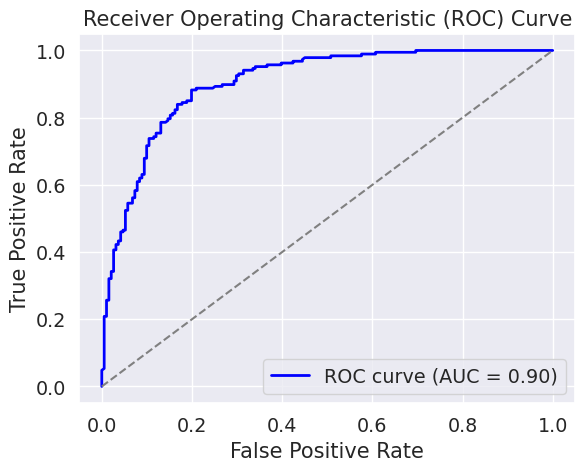

In [263]:
randomForest()

Bagging

In [264]:
def bagging():
    # Building and fitting
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    y_pred_prob = bag.predict_proba(X_test)[:, 1]

    # Store the result in a different variable name to avoid overwriting the function
    accuracy_result = evalClassModel(bag, y_test, y_pred_class, True)

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_class)
    print("Confusion Matrix:")
    print(conf_mat)

    # Additional metrics
    precision_score = metrics.precision_score(y_test, y_pred_class)
    recall_score = metrics.recall_score(y_test, y_pred_class)
    f1_score = metrics.f1_score(y_test, y_pred_class)
    # Call the accuracy_score function
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print("Precision:", precision_score)
    print("Recall:", recall_score)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig('roc_curve_bagging.png')  # Save the ROC curve as roc_curve_bagging.png
    plt.show()

    #Data for final graph
    methodDict['Bagging'] = accuracy_result * 100

Confusion Matrix:
[[141  50]
 [ 34 153]]
Precision: 0.7536945812807881
Recall: 0.8181818181818182
F1 Score: 0.7846153846153846
Accuracy: 0.7777777777777778


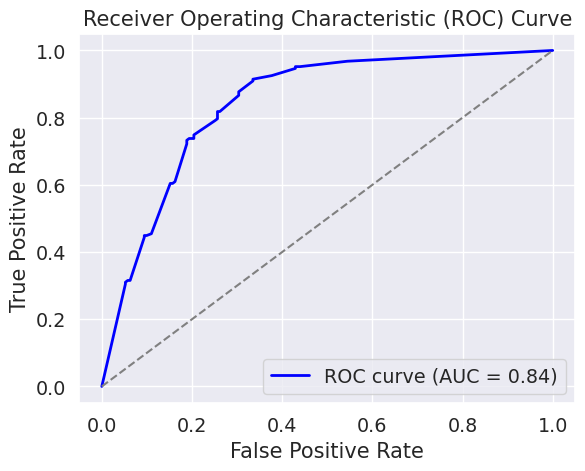

In [265]:
bagging()

Boosting

In [266]:
def boosting():
    # Building and fitting
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    y_pred_prob = boost.predict_proba(X_test)[:, 1]

    # Calculate accuracy score and store it in a different variable
    accuracy_result = evalClassModel(boost, y_test, y_pred_class, True)

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_class)
    print("Confusion Matrix:")
    print(conf_mat)

    # Additional metrics
    precision_score = metrics.precision_score(y_test, y_pred_class)
    recall_score = metrics.recall_score(y_test, y_pred_class)
    f1_score = metrics.f1_score(y_test, y_pred_class)
    # Use metrics.accuracy_score to calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print("Precision:", precision_score)
    print("Recall:", recall_score)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig('roc_curve_boosting.png')  # Save the ROC curve as roc_curve_boosting.png
    plt.show()

    #Data for final graph
    methodDict['Boosting'] = accuracy_result*100

In [267]:
#boosting()

Stacking

In [268]:
def stacking():
    # Building and fitting
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)
    y_pred_prob = stack.predict_proba(X_test)[:, 1]

    # Use a different variable name to avoid overwriting the function
    accuracy_result = evalClassModel(stack, y_test, y_pred_class, True)

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_class)
    print("Confusion Matrix:")
    print(conf_mat)

    # Additional metrics
    precision_score = metrics.precision_score(y_test, y_pred_class)
    recall_score = metrics.recall_score(y_test, y_pred_class)
    f1_score = metrics.f1_score(y_test, y_pred_class)
    # Call the accuracy_score function correctly
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print("Precision:", precision_score)
    print("Recall:", recall_score)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig('roc_curve_stacking.png')  # Save the ROC curve as roc_curve_stacking.png
    plt.show()

    #Data for final graph
    methodDict['Stacking'] = accuracy_result * 100 # Use the renamed variable here

Confusion Matrix:
[[151  40]
 [ 27 160]]
Precision: 0.8
Recall: 0.8556149732620321
F1 Score: 0.8268733850129198
Accuracy: 0.8227513227513228


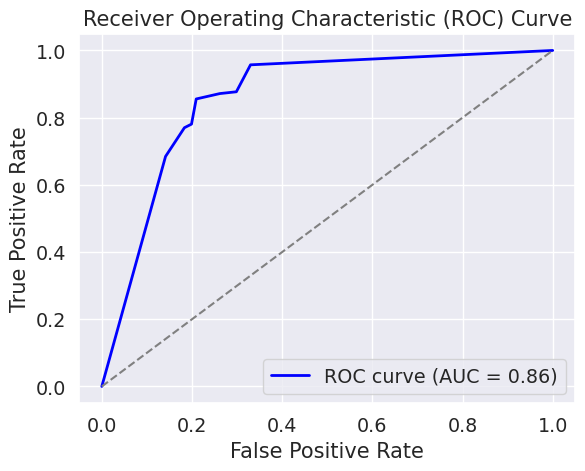

In [269]:
stacking()

#Predicting with Neural Network

Create input function

In [270]:
# %tensorflow_version 1.x
# import tensorflow as tf
# import argparse
import tensorflow as tf
import argparse

In [271]:
print(tf.__version__)

2.18.0


In [272]:
batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

Define the feature columns

In [273]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

Instantiate an Estimator

In [274]:
# # Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
# # Use tf.keras.optimizers.legacy.Adagrad
# model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
#                                     hidden_units=[10, 10],
#                                     optimizer=tf.keras.optimizers.legacy.Adagrad(
#                                       learning_rate=0.1
#                                     ))

In [275]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming these variables are defined in previous cells and available:
# train_df, feature_cols, target, batch_size, train_steps

# Define X and y (assuming this was done earlier and is correct)
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# Split data into training and testing sets (assuming this was done earlier)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Scale features if not already done (important for neural networks)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
# Import necessary Keras modules from tensorflow.keras

# Define the Keras model
model = keras.Sequential([
    # Input layer. The input_shape should match the number of features after scaling.
    layers.Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(10, activation='relu'),  # Hidden layer 1
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model with the standard Adagrad optimizer
model.compile(optimizer=Adagrad(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Keras model using the .fit() method
# Provide the scaled training data (X_train_scaled, y_train) directly
# Use epochs and batch_size for training
model.fit(X_train_scaled, y_train, epochs=train_steps // (X_train_scaled.shape[0] // batch_size), batch_size=batch_size)

# Note: The number of epochs is calculated to roughly match the total number of steps in the original Estimator code.
# Adjust epochs or batch_size as needed for your training.

# After training, you can evaluate the model using model.evaluate()
# loss, accuracy = model.evaluate(X_test_scaled, y_test)
# print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# You can also make predictions using model.predict()
# predictions = model.predict(X_test_scaled)

Epoch 1/125


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5618 - loss: 0.6541
Epoch 2/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7199 - loss: 0.5955  
Epoch 3/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7560 - loss: 0.5496 
Epoch 4/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8050 - loss: 0.4958 
Epoch 5/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8045 - loss: 0.4695 
Epoch 6/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8049 - loss: 0.4599 
Epoch 7/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7964 - loss: 0.4544 
Epoch 8/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8413 - loss: 0.4029 
Epoch 9/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8217 - loss: 0.4192 
Epoch 10/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8002 - loss: 0.4403 
Epoch 11/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8292 - loss: 0.4122 
Epoch 12/125
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8237 - loss: 0.4190 
E

Train the model

Evaluate the model

In [278]:
# Evaluate the model.
# Remove the input_fn argument and pass the scaled test data directly
eval_result = model.evaluate(X_test_scaled, y_test, batch_size=batch_size)

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(accuracy=eval_result[1])) # Access the accuracy from the returned list

#Data for final graph
# The evaluate method for Keras returns a list [loss, accuracy], so we access the accuracy at index 1
accuracy = eval_result[1] * 100
methodDict['Neural Network'] = accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7889 - loss: 0.4463 

Test set accuracy: 0.80



In [279]:
print(X_test)


           Age  Gender  family_history  benefits  care_options  anonymity  \
5     0.340909       1               1         2             1          0   
494   0.159091       1               0         0             1          0   
52    0.295455       1               0         0             0          0   
984   0.204545       1               0         2             1          2   
186   0.136364       1               0         0             0          0   
...        ...     ...             ...       ...           ...        ...   
1084  0.318182       1               1         2             2          2   
506   0.545455       1               0         2             0          0   
1142  0.227273       1               0         1             0          0   
1124  0.386364       1               0         0             1          2   
689   0.204545       0               0         0             1          2   

      leave  work_interfere  
5         0               4  
494       0    

In [281]:
print(y_test)

5       0
494     0
52      0
984     0
186     0
       ..
1084    1
506     0
1142    0
1124    0
689     1
Name: treatment, Length: 378, dtype: int64


Making predictions (inferring) from the trained model

In [283]:
predictions = list(model.predict(X_train))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [284]:
predictions = list(model.predict(X_test_scaled))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [285]:
predictions = list(model.predict(X_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [286]:
# Make predictions using the trained model on the training data
# The predict method of Keras models expects data directly, not an input_fn
predictions = list(model.predict(X_train))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [288]:
# Generate predictions from the model
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

# Dictionary for predictions
col1 = []
col2 = []
col3 = []

# Assuming model.predict(X_train) returns probabilities for the positive class
# Iterate through the index of X_train, the true labels, and the predicted probabilities
for idx, true_label, prob in zip(X_train.index, y_train, predictions):
    # 'prob' is a NumPy array containing the probability, access the single value
    # We can apply a threshold (e.g., 0.5) to get the predicted class
    predicted_class = 1 if prob[0] > 0.5 else 0
    probability_percentage = prob[0] * 100

    # Adding to dataframe
    col1.append(idx)        # Index
    col2.append(predicted_class) # Predicted class (0 or 1)
    col3.append(true_label)    # Expected (true) label

    # print(template.format(idx, predicted_class, probability_percentage, true_label))


results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,index,prediction,expected
0,929,0,0
1,901,1,1
2,579,1,1
3,367,1,1
4,615,1,1


#Success method plot

In [289]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

    plt.show()

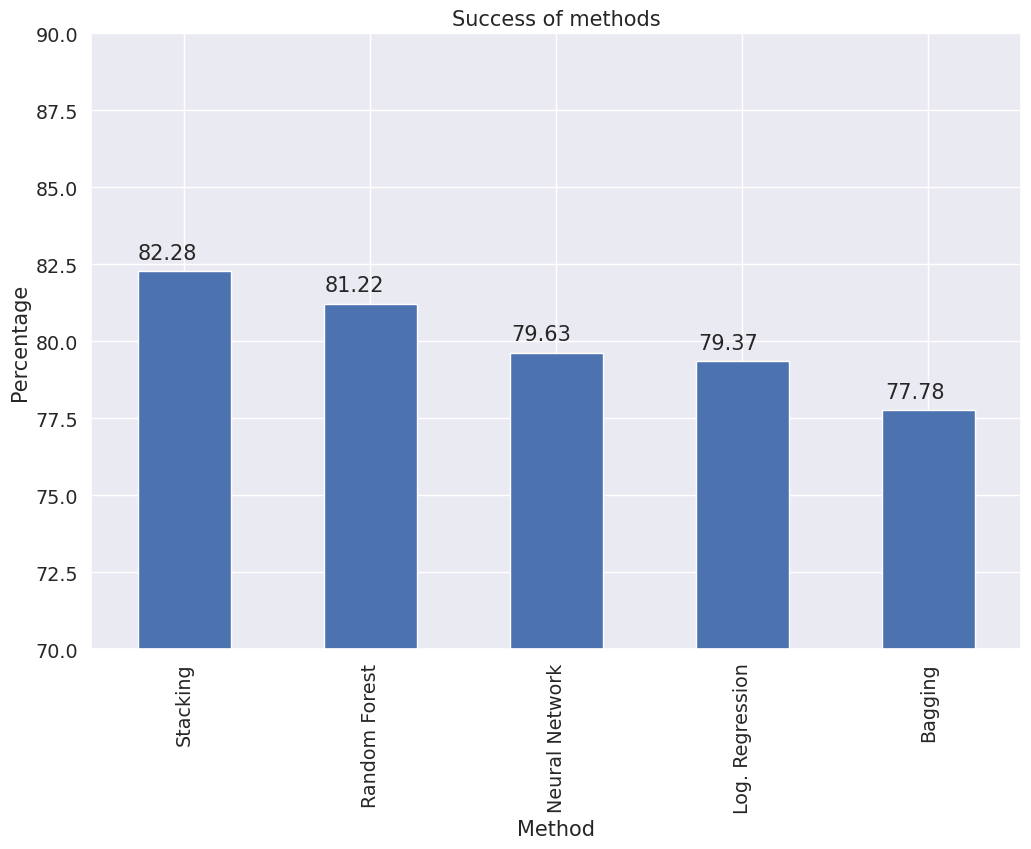

In [290]:
plotSuccess()

#Creating predictions on test set

In [291]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0


#Submission

In [292]:
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
...,...,...
373,1084,1
374,506,0
375,1142,1
376,1124,0


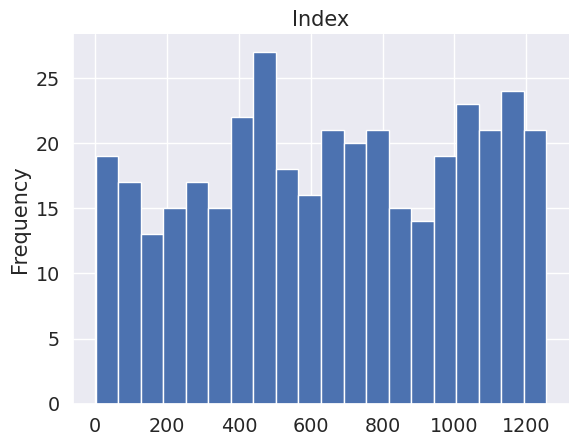

In [293]:
# @title Index

from matplotlib import pyplot as plt
results['Index'].plot(kind='hist', bins=20, title='Index')
plt.gca().spines[['top', 'right',]].set_visible(False)